# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](https://github.com/Jimmy-ai1/Pandas-eda-project1/blob/master/images/neighborhood_aerial.jpg?raw=1)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average
       5	 Average
       4	 Below Average
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [100]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [101]:
# Your code here
df = pd.read_csv('ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [102]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [103]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [104]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

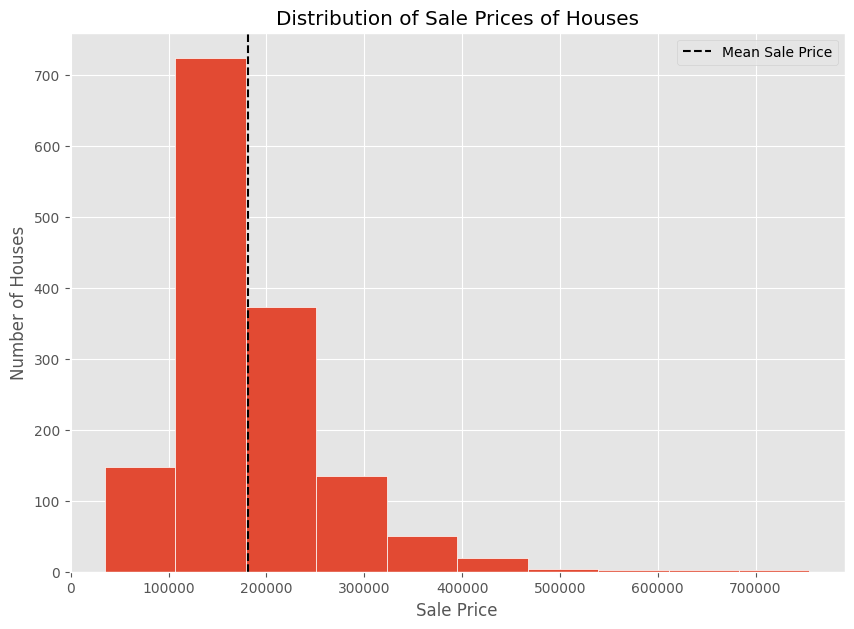

In [105]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['SalePrice'], edgecolor='white')
ax.axvline(df['SalePrice'].mean(), ls='dashed', color='black', label='Mean Sale Price')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Number of Houses')
ax.set_title('Distribution of Sale Prices of Houses')
ax.legend();

Now, print out the mean, median, and standard deviation:

In [106]:
# Your code here
print(f'''
    Mean: {df['SalePrice'].mean()}
    Median: {df['SalePrice'].median()}
    Standard Deviation: {df['SalePrice'].std()}
''')


    Mean: 180921.19589041095
    Median: 163000.0
    Standard Deviation: 79442.50288288663



In the cell below, interpret the above information.

In [107]:
# Replace None with appropriate text
"""
The SalePrice data is positively skewed with most houses ranging from ~50000 - ~350000
with very few houses having a sale price of 700000. The skewed nature of the distribution
explains why its mean is greater than its median.

The common sale price of a house is ~163000, we don't take the mean value because
it is affected by the outliers in the data.

The sale price of houses deviate from the mean by ~79000 which suggests that the
sale prices of the houses do not range around the same value i.e the sale price of
one house is very different from the sale priice of another probably due to some
factors such as the overall condition.
"""

"\nThe SalePrice data is positively skewed with most houses ranging from ~50000 - ~350000 \nwith very few houses having a sale price of 700000. The skewed nature of the distribution \nexplains why its mean is greater than its median.\n\nThe common sale price of a house is ~163000, we don't take the mean value because \nit is affected by the outliers in the data.\n\nThe sale price of houses deviate from the mean by ~79000 which suggests that the \nsale prices of the houses do not range around the same value i.e the sale price of \none house is very different from the sale priice of another probably due to some \nfactors such as the overall condition.\n"

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

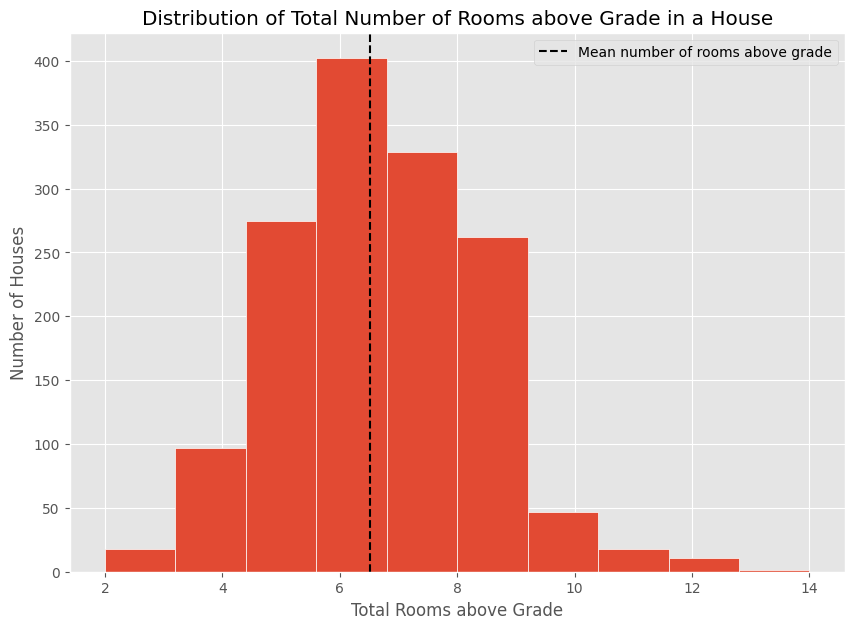

In [108]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['TotRmsAbvGrd'], edgecolor='white')
ax.axvline(df['TotRmsAbvGrd'].mean(), ls='dashed', color='black', label='Mean number of rooms above grade')
ax.set_xlabel('Total Rooms above Grade')
ax.set_ylabel('Number of Houses')
ax.set_title('Distribution of Total Number of Rooms above Grade in a House')
ax.legend();

Now, print out the mean, median, and standard deviation:

In [109]:
# Your code here
print(f'''
    Mean: {df['TotRmsAbvGrd'].mean()}
    Median: {df['TotRmsAbvGrd'].median()}
    Standard Deviation: {df['TotRmsAbvGrd'].std()}
''')


    Mean: 6.517808219178082
    Median: 6.0
    Standard Deviation: 1.625393290584064



In the cell below, interpret the above information.

In [110]:
# Replace None with appropriate text
"""
The data in the TotRmsAbvGrd column is a relatively normal distribution with the
lowest number of rooms above grade being 2 and the maximum being 14. The normal
nature of the distribution explains the slight difference in its meean and median.

The common number of total rooms that are above grade in a house is ~6.

The standard deviation of the total number of rooms above grade is low which
suggests that almost all houses have the same number of rooms that are above grade.
"""

'\nThe data in the TotRmsAbvGrd column is a relatively normal distribution with the \nlowest number of rooms above grade being 2 and the maximum being 14. The normal \nnature of the distribution explains the slight difference in its meean and median.\n\nThe common number of total rooms that are above grade in a house is ~6.\n\nThe standard deviation of the total number of rooms above grade is low which \nsuggests that almost all houses have the same number of rooms that are above grade.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

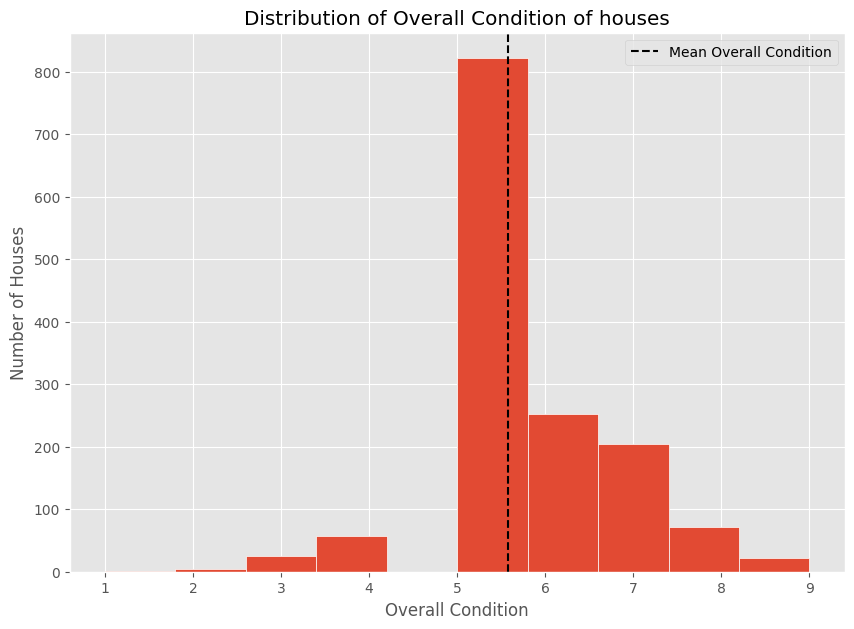

In [111]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['OverallCond'], edgecolor='white')
ax.axvline(df['OverallCond'].mean(), ls='dashed', color='black', label='Mean Overall Condition')
ax.set_xlabel('Overall Condition')
ax.set_ylabel('Number of Houses')
ax.set_title('Distribution of Overall Condition of houses')
ax.legend();

Now, print out the mean, median, and standard deviation:

In [112]:
# Your code here
print(f'''
    Mean: {df['OverallCond'].mean()}
    Median: {df['OverallCond'].median()}
    Standard Deviation: {df['OverallCond'].std()}
''')


    Mean: 5.575342465753424
    Median: 5.0
    Standard Deviation: 1.1127993367127367



In the cell below, interpret the above information.

In [113]:
# Replace None with appropriate text
"""
The data in the OverallCond column is slightly negatively skewed with the minimum
overall rating being ~2 and the maximum being 9. Most values range from an overall
condition of 5-9 with some outliers ranging from an overall condition of 2-4.

Given that the common overall rating of houses is ~5 then most houses are grouped
in the 'average' category.

The standard deviation of the overall condition of houses is ~1 which suggests that
the overall condition of each house probably differs by 1.
"""

"\nThe data in the OverallCond column is slightly negatively skewed with the minimum \noverall rating being ~2 and the maximum being 9. Most values range from an overall \ncondition of 5-9 with some outliers ranging from an overall condition of 2-4.\n\nGiven that the common overall rating of houses is ~5 then most houses are grouped \nin the 'average' category.\n\nThe standard deviation of the overall condition of houses is ~1 which suggests that \nthe overall condition of each house probably differs by 1.\n"

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [114]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [115]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

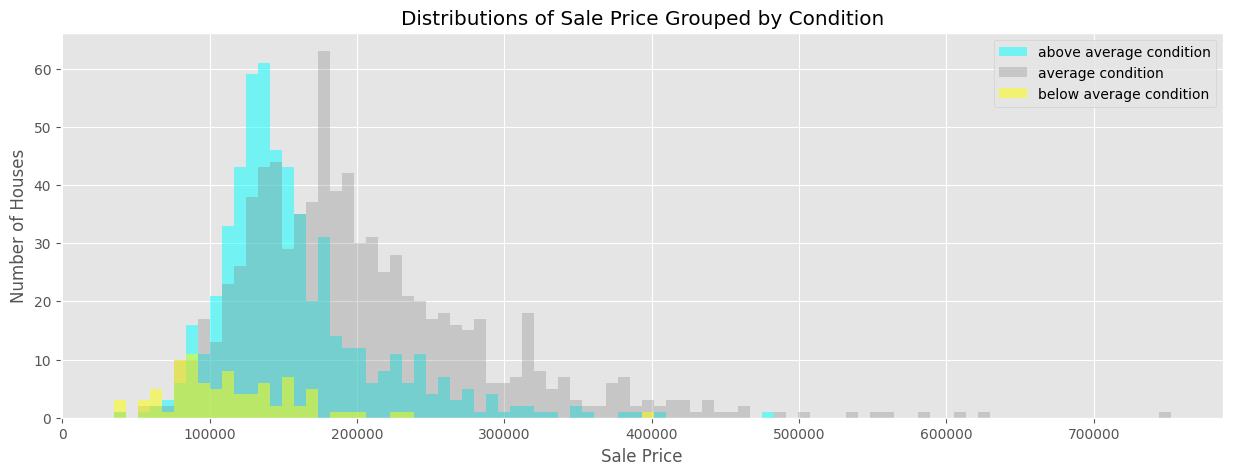

In [116]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [117]:
# Replace None with appropriate text
"""
The houses with below average condition are fewer than the rest of the other houses
in the other categories and have a lower range of sale prices than the rest of the categories.
The houses with an average overall condition have the most number of houses and a much
larger range of sale prices than both categories with the maximum sale price being
one of the houses with an average conditon. The houses with above average condition
are relatively fewer than those with average condition but considerably more than
the houses with below average condition.

Something suprising is that houses with an average overall condition have a higher
sale price the houses with above average condition. This is ironical given that we
would expect that houses that are well maintained will have a higher value than those
that are not as well maintained.

Something else that is suprising is that there are houses with below average condition
that is valued at ~400000
"""

'\nThe houses with below average condition are fewer than the rest of the other houses \nin the other categories and have a lower range of sale prices than the rest of the categories.\nThe houses with an average overall condition have the most number of houses and a much \nlarger range of sale prices than both categories with the maximum sale price being \none of the houses with an average conditon. The houses with above average condition \nare relatively fewer than those with average condition but considerably more than \nthe houses with below average condition. \n\nSomething suprising is that houses with an average overall condition have a higher \nsale price the houses with above average condition. This is ironical given that we \nwould expect that houses that are well maintained will have a higher value than those \nthat are not as well maintained.\n\nSomething else that is suprising is that there are houses with below average condition \nthat is valued at ~400000\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [118]:
# Your code here
# Extracted the numerical columns in the dataframe
numerical_cols = []
for column in df.columns:
  datatype = df[column].dtype
  if datatype == 'int64':
    numerical_cols.append(column)
df_4 = df[numerical_cols]
df_4

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500


In [119]:
correlation_matrix = df_4.corr()
correlation_matrix

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


In [120]:
specific_column = 'SalePrice'
correlation_with_specific_column = correlation_matrix[specific_column]
correlation_with_specific_column = correlation_with_specific_column.drop(specific_column)
most_positively_related = correlation_with_specific_column.idxmax()
most_positively_related

'OverallQual'

Now, find the ***most negatively correlated*** column:

In [121]:
# Your code here
specific_column = 'SalePrice'
correlation_with_specific_column = correlation_matrix[specific_column]
correlation_with_specific_column = correlation_with_specific_column.drop(specific_column)
least_positively_related = correlation_with_specific_column.idxmin()
least_positively_related

'KitchenAbvGr'

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

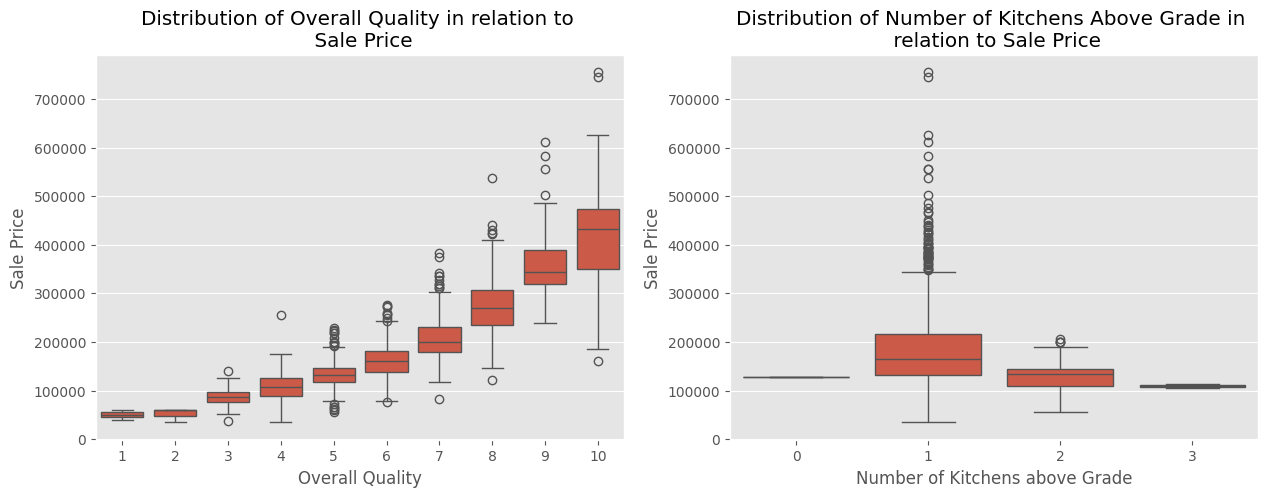

In [122]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_positively_related],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[least_positively_related],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Distribution of Overall Quality in relation to \n Sale Price')
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Distribution of Number of Kitchens Above Grade in \n relation to Sale Price')
ax2.set_xlabel('Number of Kitchens above Grade')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [123]:
# Replace None with appropriate text
"""
The houses with a very excellent Overall quality have the highest sale price while
those with very poor overall quality have the least sale price. The sale price of a
house generally increases with increase in the overall quality.

The houses with one kitchen above grade have the highest sale price while those with
3 and 0 kitchens above grade have the least. Most houses that have a lower number of
kitchens above grade tend to be of more value than those with a higher number.
"""

'\nThe houses with a very excellent Overall quality have the highest sale price while \nthose with very poor overall quality have the least sale price. The sale price of a \nhouse generally increases with increase in the overall quality.\n\nThe houses with one kitchen above grade have the highest sale price while those with \n3 and 0 kitchens above grade have the least. Most houses that have a lower number of \nkitchens above grade tend to be of more value than those with a higher number.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [124]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

,count
YrSold,
2006,314
2007,329
2008,304
2009,338
2010,175


Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

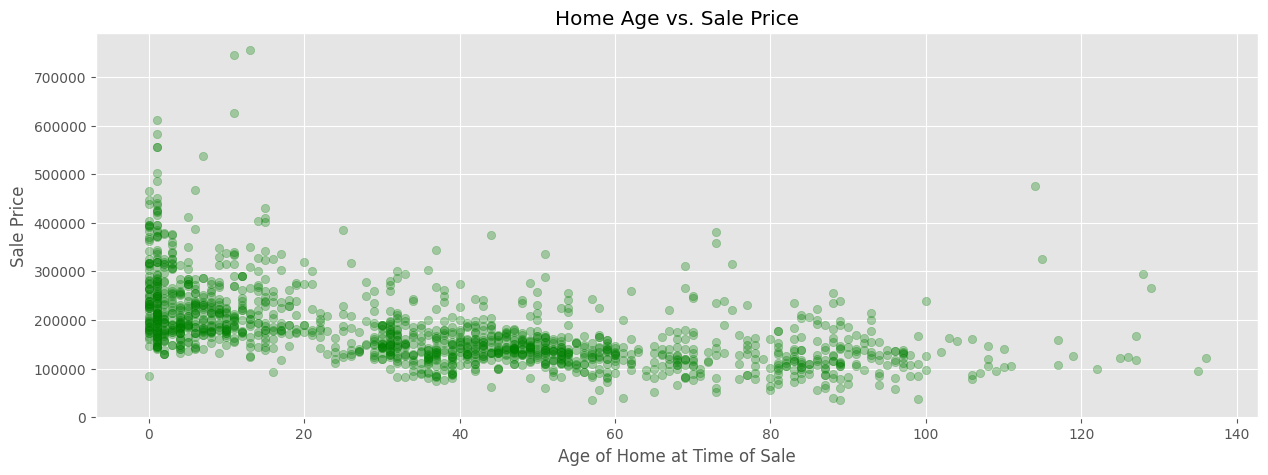

In [125]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [126]:
# Replace None with appropriate text
"""
Most houses seem to have been sold either right after being built or 30 - 60 years
after being built. Very few houses that have been sold had attained an age of above
100 before being sold.

From the scatter plot, it seems that the sale price of 'newer' houses tends to be
more than those that have been standing for more years. This is evident because the
houses sold either right after being built or a few years after being built have a
higher sale price than those that are sold after more years.

There are some exceptions to the observation above for example there is a house that
was sold after ~110 years and still sold for a lot of money (about 500000). This could
be because of the overall quality of the house or the overall condition of the house.
"""

"\nMost houses seem to have been sold either right after being built or 30 - 60 years \nafter being built. Very few houses that have been sold had attained an age of above \n100 before being sold.\n\nFrom the scatter plot, it seems that the sale price of 'newer' houses tends to be\nmore than those that have been standing for more years. This is evident because the \nhouses sold either right after being built or a few years after being built have a \nhigher sale price than those that are sold after more years.\n\nThere are some exceptions to the observation above for example there is a house that \nwas sold after ~110 years and still sold for a lot of money (about 500000). This could \nbe because of the overall quality of the house or the overall condition of the house.\n"

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.